<h1>Phase 3: GARCH Calibration and Volatility Assessment<h1>

#Import necessary libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
from datetime import timedelta
import yfinance as yf
import arch
import statsmodels.api as sm
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [22]:
sns.set_style("whitegrid")

plt.rc("figure", figsize=(16, 8))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

### Log Returns of Stock Indexes

In [23]:
tickers = ['^FTSE']
start_date = '2007-01-01'
end_date = '2009-01-01'

data = yf.download(tickers, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [24]:
returns = 100 * data.Close.ffill().pct_change().dropna()

Text(0.5, 1.0, '^FTSE Returns')

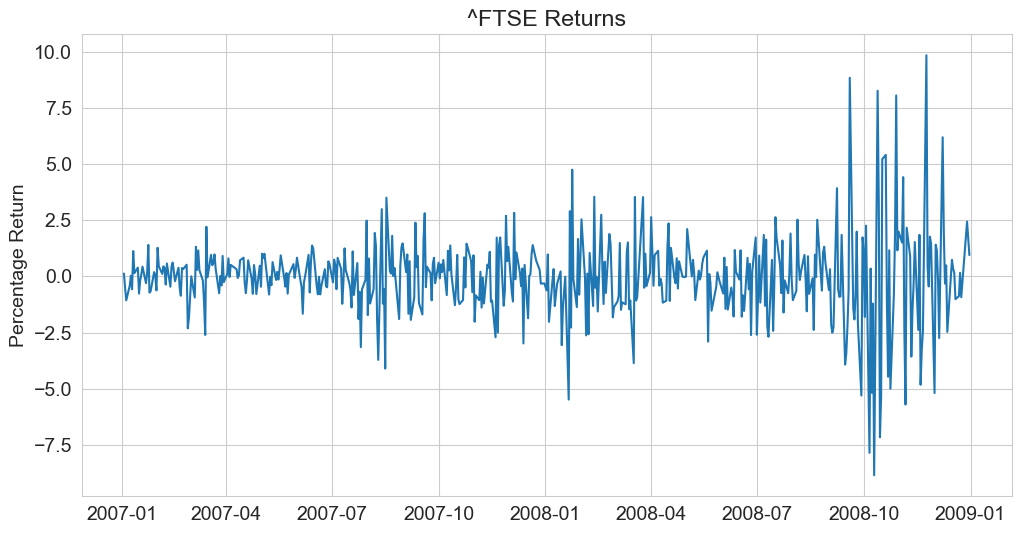

In [25]:
plt.figure(figsize=(12,6))
plt.plot(returns)
plt.ylabel('Percentage Return')
plt.title('^FTSE Returns')

### PACF

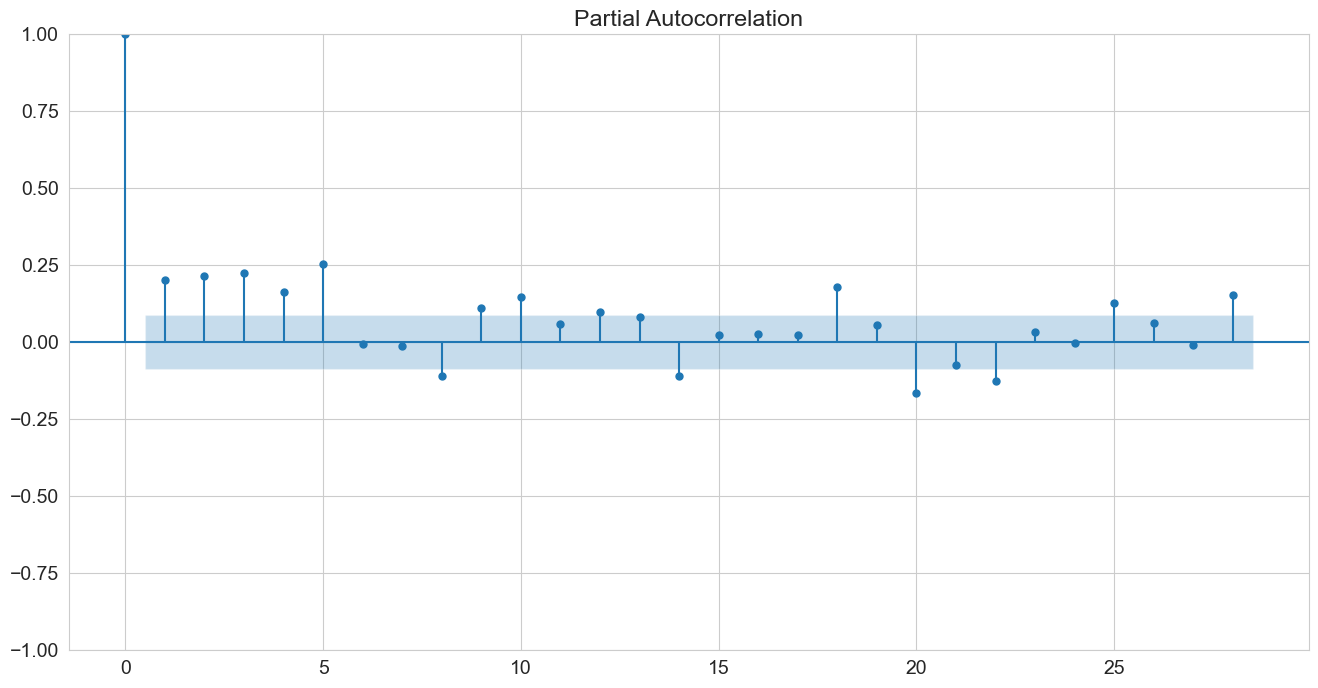

In [26]:
# squares each value in the returns variable
plot_pacf(returns**2)
plt.show()

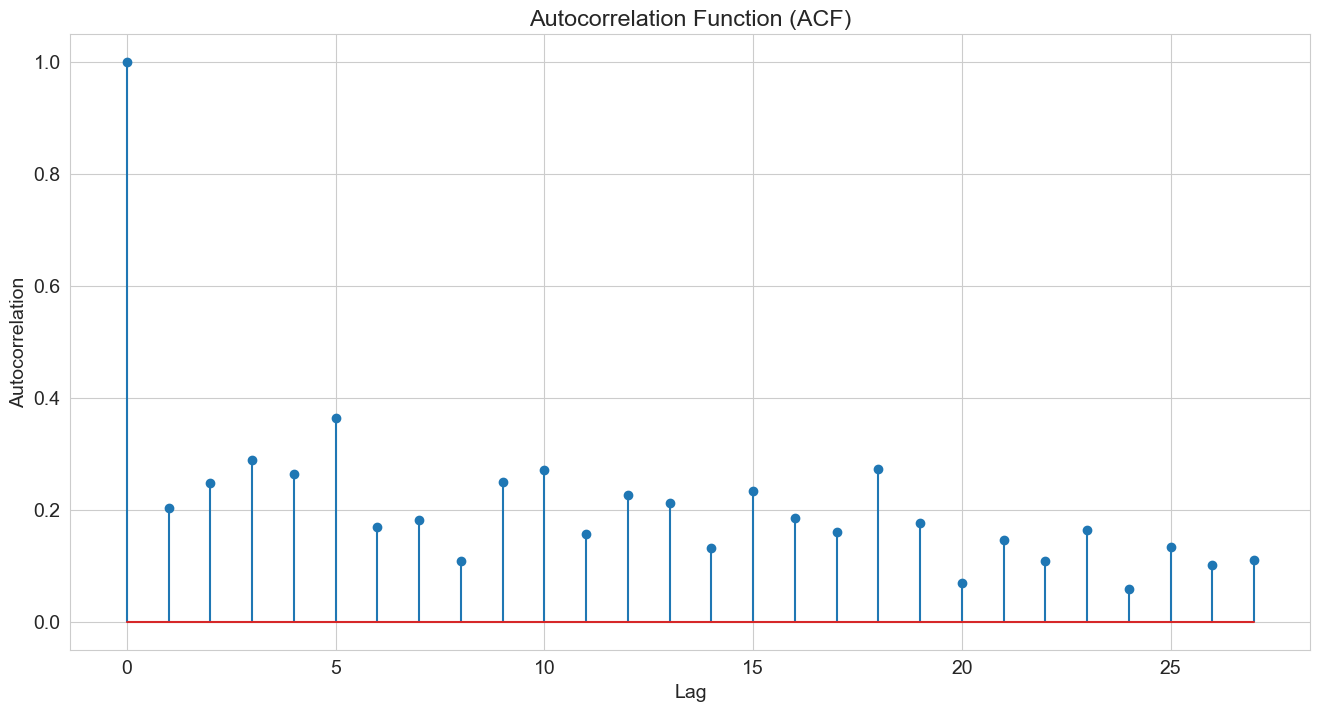

In [27]:
acf_result = sm.tsa.acf(returns**2)

#Plot ACF
plt.stem(acf_result)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

### Fit GARCH(3,3)

In [28]:
# Create GARCH-t model
model = arch_model(returns, p=3, q=0, vol='Garch', dist='t')

In [29]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2223.117433123422
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1441.8951115254163
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1464.5487465614397
Iteration:      4,   Func. Count:     34,   Neg. LLF: 1299.4468855886435
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1033.4143879572425
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1014.1157481537565
Iteration:      7,   Func. Count:     59,   Neg. LLF: 911.8044086218047
Iteration:      8,   Func. Count:     66,   Neg. LLF: 910.7169871166287
Iteration:      9,   Func. Count:     73,   Neg. LLF: 910.4769523508965
Iteration:     10,   Func. Count:     81,   Neg. LLF: 909.3927805567918
Iteration:     11,   Func. Count:     88,   Neg. LLF: 909.3383659265457
Iteration:     12,   Func. Count:     95,   Neg. LLF: 909.3232362568418
Iteration:     13,   Func. Count:    102,   Neg. LLF: 909.3169839258078
Iteration:     14,   Func. Count:    109,   Neg. LLF: 909.3

In [30]:
print(model_fit.summary())

                         Constant Mean - ARCH Model Results                         
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -909.311
Distribution:      Standardized Student's t   AIC:                           1830.62
Method:                  Maximum Likelihood   BIC:                           1855.98
                                              No. Observations:                  506
Date:                      Sat, Jan 27 2024   Df Residuals:                      505
Time:                              16:16:12   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu     

In [31]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [32]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

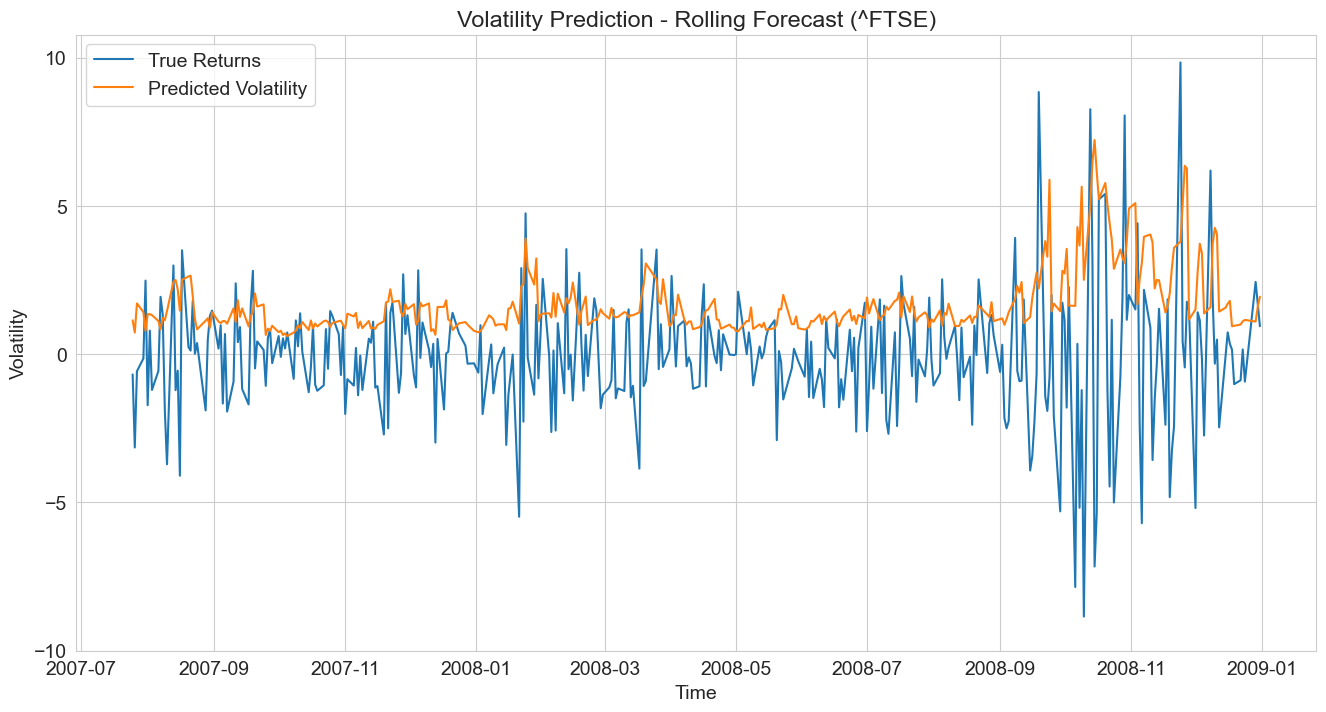

In [36]:
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast (^FTSE)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend(['True Returns', 'Predicted Volatility'])

plt.yticks(range(-10, 11, 5))

plt.savefig('Volatility_Comparison_FTSE.png')